In [2]:
%matplotlib inline
from pyspecies import pop, models

### Simulating a Lotka-Volterra cycle

We want to simulate a cyclical solution of the Lotka-Volterra model:
$${\displaystyle \left\{{\begin{array}{ccc}{\partial_t u}&=&u\ {\Big (}\alpha -\beta v{\Big )}\\{\partial_t v}&=&v\ {\Big (}\delta u-\gamma {\Big )}\end{array}}\right.}$$

We begin by defining two populations that are uniformly distributed in space. The class `models.LV` takes 4 parameters $\alpha$, $\beta$, $\delta$, $\gamma$ which must all be positive.

In [4]:
p = pop.Pop(
    space = (0, 1, 10),      # lower bound, upper bound, number of points
    u0 = lambda x: 1 + 0*x,  # IC for prey
    v0 = lambda x: 1 + 0*x,  # IC for predator
    model = models.LV(1.1, 0.4, 0.4, 0.1)
)

We then proceed to two consecutive advances of the simulation, which allows us to observe in more detail what happens at different time scales.

In [3]:
# 20 first seconds = 200 time steps
p.sim(duration=20, N=200)

# 100 following seconds = 200 time steps
p.sim(duration=100, N=200)

Simulation in progress: 100%|██████████| 199/199 [00:01<00:00, 136.93it/s]


We finally animate the result:

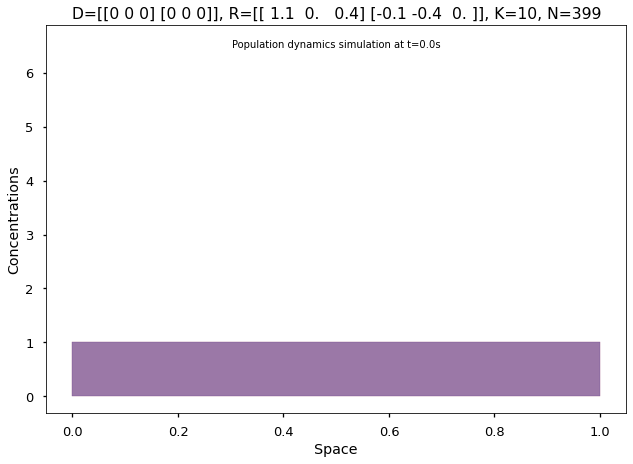

In [4]:
p.anim()

### Blow-off solution to the SKT model

The SKT model is a generalization of the previous model including 6 reaction terms and 6 diffusion terms (linear, quadratic and cross diffusion):
$$\begin{cases}
\partial_{t}u-\Delta(c_{1}u+d_{11}u^{2}+d_{12}uv) & =u(r_{1}-s_{11}u-s_{12}v)\\
\partial_{t}v-\Delta(c_{2}v+d_{21}uv+d_{22}v^{2}) & =v(r_{2}-s_{21}u-s_{22}v)
\end{cases}$$

These terms may be interpreted as follow:
| Term     | When positive | When negative     | Predominant when         |
|----------|---------------|-------------------|--------------------------|
| $r_i$    | Reproduction  | Death             | Small $i$ population     |
| $s_{ii}$ | Death         | Reproduction      | Large $i$ population     |
| $s_{ij}$ | Prey nature   | Predatory nature  | Strong coexistence       |
| $d_i$    | Diffusion     | Concentration     | Large $i$ population     |
| $d_{ii}$ | Avoids peaks  | Peak overflow     | Population peaks for $i$ |
| $d_{ij}$ | Segregation   | Xenophilia        | Strong coexistence       |

We summarize them in the following matrices:
$$D:=\begin{pmatrix}c_{1} & d_{11} & d_{12}\\
c_{2} & d_{21} & d_{22}
\end{pmatrix}\quad\text{and}\quad R:=\begin{pmatrix}r_{1} & s_{11} & s_{12}\\
r_{2} & s_{21} & s_{22}
\end{pmatrix}$$

These notations are used by the `models.SKT` class. Let's define our new population:

In [5]:
import numpy as np

q = pop.Pop(
    space = (0, 1, 200),   # we need more points
    u0 = lambda x: 1 + np.cos(2*np.pi*x),
    v0 = lambda x: 1 + np.sin(2*np.pi*x),
    model = models.SKT(
        D=np.array([[1, 0, 1], [1e-3, 0, 0]]),
        R=np.array([[4, 2, 0], [1, 1, 0]])
    )
)

We can now do the computations:

In [6]:
q.sim(duration=0.1, N=200)
q.sim(duration=2.4, N=200)

Simulation in progress: 100%|██████████| 199/199 [00:01<00:00, 118.64it/s]


And print the result:

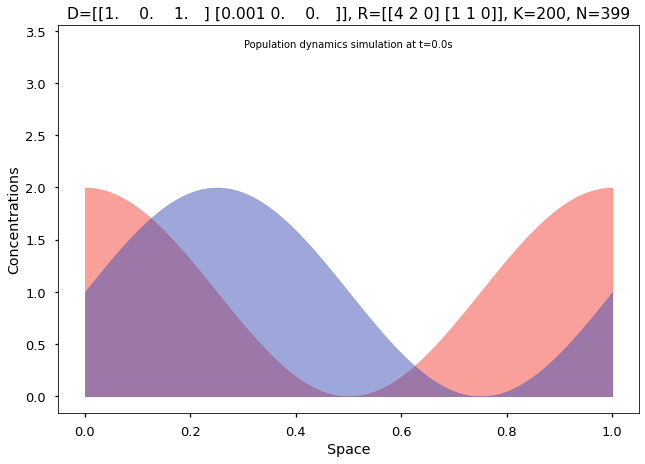

In [7]:
q.anim()